# Summary

The project is used to showcase various ways of cleaning the data while variables are unknown. Process involves include:

- Removing duplicate columns and rows
- Visualizing numerical and categorical variables
- Fill missing values
- Change datatype
- Standardize numerical data and encode categorical data
- Save and load arff files
- Balance data with SMOTE to avoid overfitting
- Search best parameters with gridsearch
- Train and compare accuracy of multiple models (KNN, Decision Tree, Gaussian Naive Bayes, SVM)

In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# read the file
df = pd.read_csv('data.csv')
df.head()

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
0,1,0.0,3.0,2.0,V1,3,V4,3,V0,600,...,V1,1,V2,45912,V2,NaN,NaN,600,V1,V2
1,2,1.0,20.0,1.0,V2,4,V4,20,V4,5003,...,V2,2,V0,24738,V5,NaN,NaN,5003,V2,V2
2,3,0.0,11.0,1.0,V4,3,V3,11,V4,3398,...,V2,1,V3,33726,V2,NaN,NaN,3398,V1,V3
3,4,0.0,10.0,2.0,V3,2,V4,10,V2,1597,...,V1,1,V0,4466,V2,NaN,NaN,1597,V1,V3
4,5,0.0,15.0,1.0,V4,2,V4,15,V4,1978,...,V2,1,V3,35051,V2,NaN,NaN,1978,V1,V3


In [3]:
# check num of rows and col and missing val
# 1,2,14,19,28,29 missing (28,29 missing too many values so delete them)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1100 non-null   int64  
 1   Class   1000 non-null   float64
 2   C1      1093 non-null   float64
 3   C2      1094 non-null   float64
 4   C3      1100 non-null   object 
 5   C4      1100 non-null   int64  
 6   C5      1100 non-null   object 
 7   C6      1100 non-null   int64  
 8   C7      1100 non-null   object 
 9   C8      1100 non-null   int64  
 10  C9      1100 non-null   int64  
 11  C10     1100 non-null   object 
 12  C11     1100 non-null   object 
 13  C12     1100 non-null   object 
 14  C13     1100 non-null   int64  
 15  C14     1094 non-null   object 
 16  C15     1100 non-null   int64  
 17  C16     1100 non-null   object 
 18  C17     1100 non-null   object 
 19  C18     1100 non-null   object 
 20  C19     1093 non-null   object 
 21  C20     1100 non-null   int64  
 22  

In [4]:
# see how many null value exists (ignore class as it is what we predict)
df.isnull().sum()

ID          0
Class     100
C1          7
C2          6
C3          0
C4          0
C5          0
C6          0
C7          0
C8          0
C9          0
C10         0
C11         0
C12         0
C13         0
C14         6
C15         0
C16         0
C17         0
C18         0
C19         7
C20         0
C21         0
C22         0
C23         0
C24         0
C25         0
C26         0
C27         0
C28      1093
C29      1095
C30         0
C31         0
C32         0
dtype: int64

In [5]:
# drop dup row
df.drop_duplicates(inplace=True)
# drop dup col
df=df.T.drop_duplicates().T
# remove col that is empty more than 80%
df.drop(df.columns[df.isnull().mean() > 0.8],axis=1,inplace=True)

In [6]:
# check datatype
# C(16,27,30) removed as dup col 
# everything is now considered as object so need to change to respective datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1100 non-null   object
 1   Class   1000 non-null   object
 2   C1      1093 non-null   object
 3   C2      1094 non-null   object
 4   C3      1100 non-null   object
 5   C4      1100 non-null   object
 6   C5      1100 non-null   object
 7   C6      1100 non-null   object
 8   C7      1100 non-null   object
 9   C8      1100 non-null   object
 10  C9      1100 non-null   object
 11  C10     1100 non-null   object
 12  C11     1100 non-null   object
 13  C12     1100 non-null   object
 14  C13     1100 non-null   object
 15  C14     1094 non-null   object
 16  C15     1100 non-null   object
 17  C17     1100 non-null   object
 18  C18     1100 non-null   object
 19  C19     1093 non-null   object
 20  C20     1100 non-null   object
 21  C21     1100 non-null   object
 22  C22     1100 non-null   

In [7]:
# check their unique value
for col in df:
    print(col)
    print(df[col].unique())

ID
[1 2 3 ... 1098 1099 1100]
Class
[0.0 1.0 nan]
C1
[3.0 20.0 11.0 10.0 15.0 9.0 23.0 12.0 17.0 14.0 24.0 18.0 30.0 8.0 16.0
 36.0 5.0 29.0 39.0 59.0 21.0 47.0 35.0 42.0 48.0 6.0 4.0 26.0 27.0 41.0
 nan 33.0 7.0 19.0 22.0 32.0 60.0 28.0 13.0 44.0 38.0 45.0 72.0 53.0 40.0]
C2
[2.0 1.0 nan]
C3
['V1' 'V2' 'V4' 'V3']
C4
[3 4 2 1]
C5
['V4' 'V3' 'V1' 'V2']
C6
[3 20 11 10 15 9 23 12 17 14 24 18 30 8 16 36 5 29 39 59 21 47 35 42 48 6
 4 26 27 41 33 7 19 22 32 60 28 13 44 38 45 72 53 40]
C7
['V0' 'V4' 'V2' 'V3' 'V1']
C8
[600 5003 3398 1597 1978 408 1137 1601 5804 1656 3594 2507 763 673 5128
 5801 3189 1478 1343 6842 1244 7485 1448 3049 1174 3234 3835 1237 882 776
 1216 3655 6578 4248 1493 3512 683 3572 2568 1373 3620 7596 2028 2898
 14026 4582 1537 1566 1199 1297 1153 2744 4240 2319 6224 2610 1659 9398
 14781 2624 1525 9566 3878 3872 1262 6187 7581 1371 4042 1345 1169 2811
 1288 652 6077 2030 1365 1235 1246 2080 6287 1391 8085 3631 888 4526 1249
 931 1036 4041 6567 1149 7475 6758 2403 1091 238

In [8]:
# classify them into numeric,categorical and irrelevant attributes
num=['C1', 'C6','C8','C13','C20','C26']
cat=['C2', 'C3','C4','C5','C7','C9','C10','C11','C12','C14','C18','C19','C23','C24','C25','C31','C32']
useless=['ID', 'C15','C17','C21','C22']

In [9]:
# drop irrelevant attributes
df.drop(useless, axis=1, inplace=True)

In [10]:
# split df to train test data
train_data=df.iloc[:1000,:].copy()
test_data=df.iloc[1000:,:].copy()
test_data=test_data.drop('Class',axis=1)

In [11]:
# change attributes to respective datatype
train_data[num] = train_data[num].apply(pd.to_numeric)
train_data[cat]=train_data[cat].astype('object')
train_data["Class"]=train_data["Class"].astype('int64')
test_data[num] = test_data[num].apply(pd.to_numeric)
test_data[cat]=test_data[cat].astype('object')

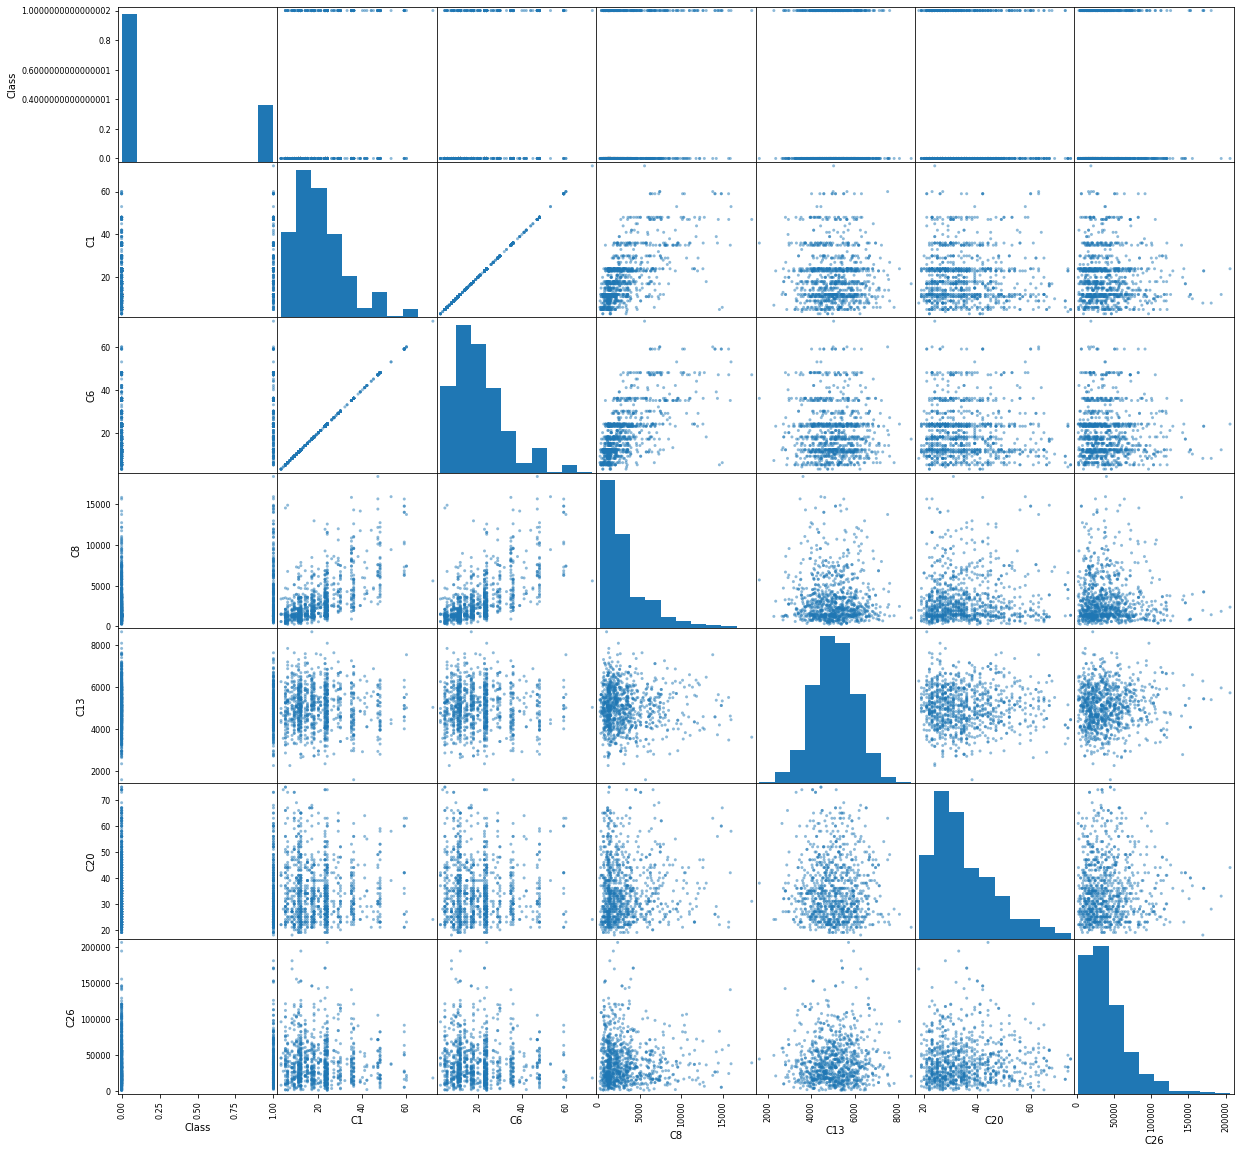

In [12]:
# check on numeric attribute
# C1:only numeric attribute that has missing value
from pandas.plotting import scatter_matrix
scatter_matrix(train_data,figsize=(20,20))
plt.show()
#(1)data seems to be skewed (2)C1,2 are strongly correlated(appears to be duplicates)

In [13]:
# drop C1
train_data.drop('C1',axis=1,inplace=True)
test_data.drop('C1',axis=1,inplace=True)
num.remove('C1')

In [14]:
# check if it is dropped
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   1000 non-null   int64 
 1   C2      996 non-null    object
 2   C3      1000 non-null   object
 3   C4      1000 non-null   object
 4   C5      1000 non-null   object
 5   C6      1000 non-null   int64 
 6   C7      1000 non-null   object
 7   C8      1000 non-null   int64 
 8   C9      1000 non-null   object
 9   C10     1000 non-null   object
 10  C11     1000 non-null   object
 11  C12     1000 non-null   object
 12  C13     1000 non-null   int64 
 13  C14     995 non-null    object
 14  C18     1000 non-null   object
 15  C19     996 non-null    object
 16  C20     1000 non-null   int64 
 17  C23     1000 non-null   object
 18  C24     1000 non-null   object
 19  C25     1000 non-null   object
 20  C26     1000 non-null   int64 
 21  C31     1000 non-null   object
 22  C32     1000 non-null   o

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1000 to 1099
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C2      98 non-null     object
 1   C3      100 non-null    object
 2   C4      100 non-null    object
 3   C5      100 non-null    object
 4   C6      100 non-null    int64 
 5   C7      100 non-null    object
 6   C8      100 non-null    int64 
 7   C9      100 non-null    object
 8   C10     100 non-null    object
 9   C11     100 non-null    object
 10  C12     100 non-null    object
 11  C13     100 non-null    int64 
 12  C14     99 non-null     object
 13  C18     100 non-null    object
 14  C19     97 non-null     object
 15  C20     100 non-null    int64 
 16  C23     100 non-null    object
 17  C24     100 non-null    object
 18  C25     100 non-null    object
 19  C26     100 non-null    int64 
 20  C31     100 non-null    object
 21  C32     100 non-null    object
dtypes: int64(5), object(17

In [16]:
# both test and train appears to have missing values
# now work on categorical attributes(pick mode to fillna)
# check mode for each class (appears to be the same)
missing=['C2','C14','C19']
for x in missing:
    print(x)
    print(train_data[train_data['Class']==0][x].mode())
    print(train_data[train_data['Class']==1][x].mode())

C2
0    1.0
dtype: object
0    1.0
dtype: object
C14
0    V3
dtype: object
0    V3
dtype: object
C19
0    V3
dtype: object
0    V3
dtype: object


In [17]:
# fillna with mode
train_data.fillna(train_data.select_dtypes(include='object').mode().iloc[0], inplace=True)
test_data.fillna(test_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [18]:
# check if no missing value
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   1000 non-null   int64  
 1   C2      1000 non-null   float64
 2   C3      1000 non-null   object 
 3   C4      1000 non-null   int64  
 4   C5      1000 non-null   object 
 5   C6      1000 non-null   int64  
 6   C7      1000 non-null   object 
 7   C8      1000 non-null   int64  
 8   C9      1000 non-null   int64  
 9   C10     1000 non-null   object 
 10  C11     1000 non-null   object 
 11  C12     1000 non-null   object 
 12  C13     1000 non-null   int64  
 13  C14     1000 non-null   object 
 14  C18     1000 non-null   object 
 15  C19     1000 non-null   object 
 16  C20     1000 non-null   int64  
 17  C23     1000 non-null   object 
 18  C24     1000 non-null   int64  
 19  C25     1000 non-null   object 
 20  C26     1000 non-null   int64  
 21  C31     1000 non-null   object 
 22  C

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1000 to 1099
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C2      100 non-null    float64
 1   C3      100 non-null    object 
 2   C4      100 non-null    int64  
 3   C5      100 non-null    object 
 4   C6      100 non-null    int64  
 5   C7      100 non-null    object 
 6   C8      100 non-null    int64  
 7   C9      100 non-null    int64  
 8   C10     100 non-null    object 
 9   C11     100 non-null    object 
 10  C12     100 non-null    object 
 11  C13     100 non-null    int64  
 12  C14     100 non-null    object 
 13  C18     100 non-null    object 
 14  C19     100 non-null    object 
 15  C20     100 non-null    int64  
 16  C23     100 non-null    object 
 17  C24     100 non-null    int64  
 18  C25     100 non-null    object 
 19  C26     100 non-null    int64  
 20  C31     100 non-null    object 
 21  C32     100 non-null    object 
dty

In [20]:
# drop dup rows now that everything is filled (appears to have 100 dup row)
train_data.drop_duplicates(inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   900 non-null    int64  
 1   C2      900 non-null    float64
 2   C3      900 non-null    object 
 3   C4      900 non-null    int64  
 4   C5      900 non-null    object 
 5   C6      900 non-null    int64  
 6   C7      900 non-null    object 
 7   C8      900 non-null    int64  
 8   C9      900 non-null    int64  
 9   C10     900 non-null    object 
 10  C11     900 non-null    object 
 11  C12     900 non-null    object 
 12  C13     900 non-null    int64  
 13  C14     900 non-null    object 
 14  C18     900 non-null    object 
 15  C19     900 non-null    object 
 16  C20     900 non-null    int64  
 17  C23     900 non-null    object 
 18  C24     900 non-null    int64  
 19  C25     900 non-null    object 
 20  C26     900 non-null    int64  
 21  C31     900 non-null    object 
 22  C3

In [21]:
# change to respective datatype
train_data[num] = train_data[num].apply(pd.to_numeric)
train_data[cat]=train_data[cat].astype('object')
train_data["Class"]=train_data["Class"].astype('int64')
test_data[num] = test_data[num].apply(pd.to_numeric)
test_data[cat]=test_data[cat].astype('object')

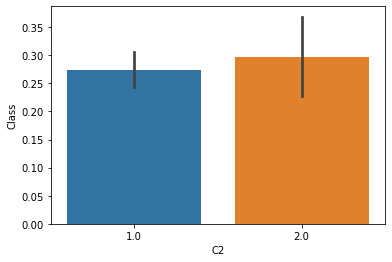

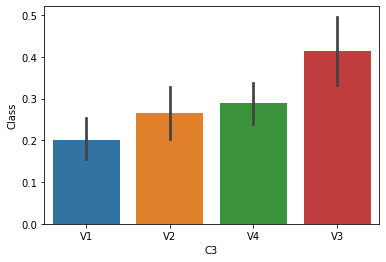

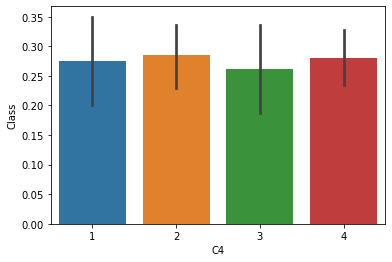

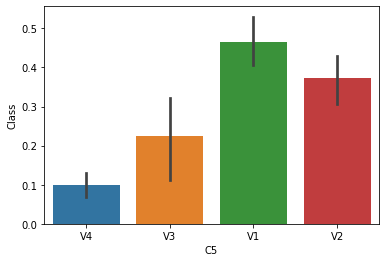

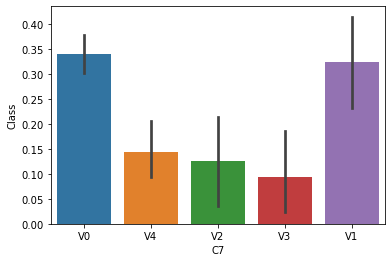

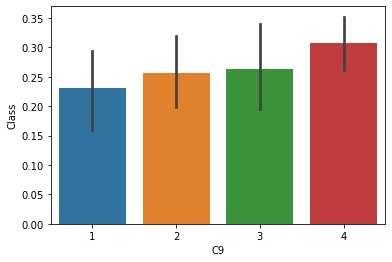

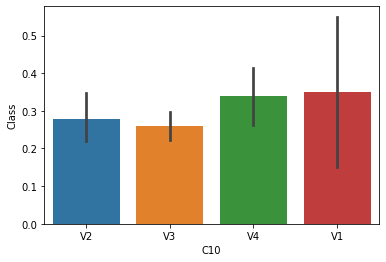

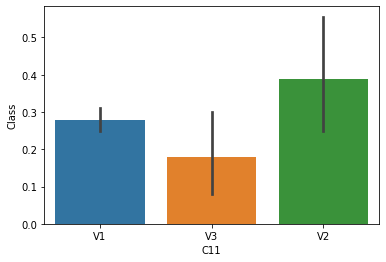

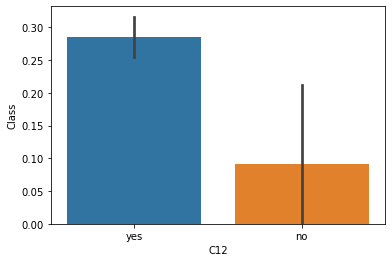

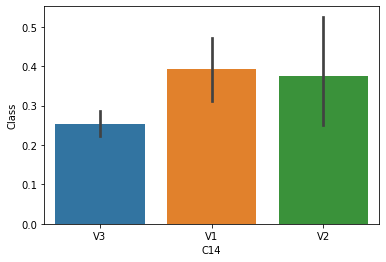

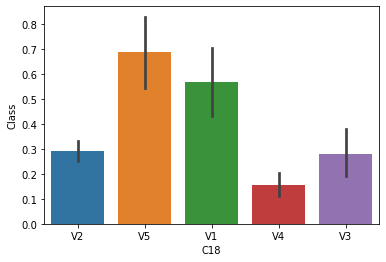

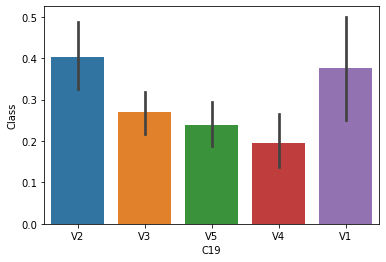

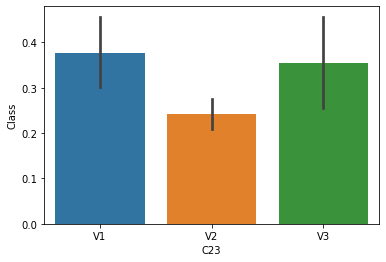

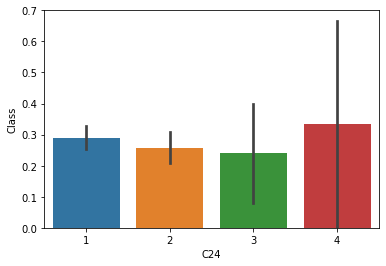

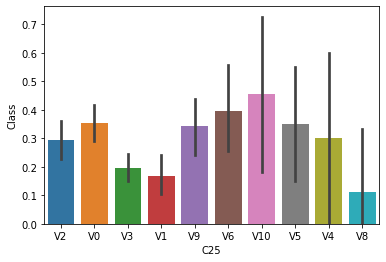

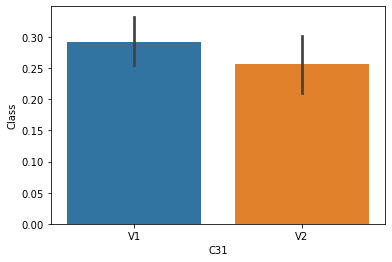

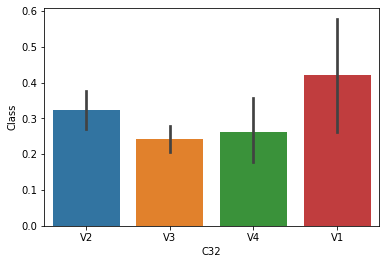

In [22]:
# see if any correlation in categorical attribute to class1
# some are strongly correlated to class0 Ex:C5_V4(90% classified as class 0)
for z in cat:
    sns.barplot(x=z, y='Class', data=train_data)
    plt.show()

In [23]:
# check class size (class is not balance)
train_data.groupby('Class').size()

Class
0    650
1    250
dtype: int64

In [24]:
# standardise numeric attribute
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data[num] = sc.fit_transform(train_data[num])
test_data[num] = sc.transform(test_data[num])

In [25]:
# encode categorical attribute
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cat:
    train_data[x]=le.fit_transform(train_data[x])
    test_data[x]=le.transform(test_data[x])

In [26]:
train_data.head()

,Class,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C14,C18,C19,C20,C23,C24,C25,C26,C31,C32
0,0,1,0,2,3,-1.443004,0,-0.937244,0,1,...,2,1,1,-1.139487,0,0,3,0.170343,0,1
1,1,0,1,3,3,-0.017792,4,0.607654,0,2,...,0,4,2,-0.531426,1,1,0,-0.533200,1,1
2,0,0,3,2,2,-0.772316,4,0.044501,1,3,...,2,1,4,0.076635,1,0,4,-0.234558,0,2
3,0,1,2,1,3,-0.856152,2,-0.587423,2,1,...,2,1,2,0.424099,0,0,0,-1.206772,0,2
4,0,0,3,1,3,-0.436972,4,-0.453740,3,2,...,2,1,4,-0.097097,1,0,4,-0.190532,0,2


In [27]:
# save to csv file
train_data.to_csv('train_data.csv',index=False)
test_data.to_csv('test_data.csv',index=False)

In [28]:
# and arff file
import arff
arff.dump('test_data.arff',test_data.values,relation="test", names=test_data.columns)
arff.dump('train_data.arff',train_data.values,relation="train", names=train_data.columns)

In [29]:
# read the arff file
from scipy.io import arff as arf
data,meta=arf.loadarff('train_data.arff')
df=pd.DataFrame(data=data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   900 non-null    float64
 1   C2      900 non-null    float64
 2   C3      900 non-null    float64
 3   C4      900 non-null    float64
 4   C5      900 non-null    float64
 5   C6      900 non-null    float64
 6   C7      900 non-null    float64
 7   C8      900 non-null    float64
 8   C9      900 non-null    float64
 9   C10     900 non-null    float64
 10  C11     900 non-null    float64
 11  C12     900 non-null    float64
 12  C13     900 non-null    float64
 13  C14     900 non-null    float64
 14  C18     900 non-null    float64
 15  C19     900 non-null    float64
 16  C20     900 non-null    float64
 17  C23     900 non-null    float64
 18  C24     900 non-null    float64
 19  C25     900 non-null    float64
 20  C26     900 non-null    float64
 21  C31     900 non-null    float64
 22  C3

In [30]:
# set back to respective datatype
df[num] = df[num].apply(pd.to_numeric)
df[cat]=df[cat].astype('object')
df["Class"]=df["Class"].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   900 non-null    int64  
 1   C2      900 non-null    object 
 2   C3      900 non-null    object 
 3   C4      900 non-null    object 
 4   C5      900 non-null    object 
 5   C6      900 non-null    float64
 6   C7      900 non-null    object 
 7   C8      900 non-null    float64
 8   C9      900 non-null    object 
 9   C10     900 non-null    object 
 10  C11     900 non-null    object 
 11  C12     900 non-null    object 
 12  C13     900 non-null    float64
 13  C14     900 non-null    object 
 14  C18     900 non-null    object 
 15  C19     900 non-null    object 
 16  C20     900 non-null    float64
 17  C23     900 non-null    object 
 18  C24     900 non-null    object 
 19  C25     900 non-null    object 
 20  C26     900 non-null    float64
 21  C31     900 non-null    object 
 22  C3

In [31]:
# function to sample data into train and validate set(50:50 in class)
def val50(data,ran):
    c0=data[data['Class']==0]
    c1=data[data['Class']==1]
    sam0=data.loc[c0.sample(50,random_state=ran).index.tolist()]
    sam1=data.loc[c1.sample(50,random_state=ran).index.tolist()]
    val=pd.concat([sam0,sam1])
    X_val=val.drop('Class',axis=1)
    y_val=val['Class']
    train=data.drop(val.index.tolist())
    X_train=train.drop('Class',axis=1)
    y_train=train['Class']
    return X_train,X_val,y_train,y_val

In [32]:
# use function with random as 1 (shape indicate it is split correctly)
X_train,X_val,y_train,y_val=val50(df,1)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((800, 22), (100, 22), (800,), (100,))

In [33]:
# validate set(50:50 in class)
y_val.value_counts()

0    50
1    50
Name: Class, dtype: int64

In [34]:
# attribute and datatype are correct
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 898
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C2      800 non-null    object 
 1   C3      800 non-null    object 
 2   C4      800 non-null    object 
 3   C5      800 non-null    object 
 4   C6      800 non-null    float64
 5   C7      800 non-null    object 
 6   C8      800 non-null    float64
 7   C9      800 non-null    object 
 8   C10     800 non-null    object 
 9   C11     800 non-null    object 
 10  C12     800 non-null    object 
 11  C13     800 non-null    float64
 12  C14     800 non-null    object 
 13  C18     800 non-null    object 
 14  C19     800 non-null    object 
 15  C20     800 non-null    float64
 16  C23     800 non-null    object 
 17  C24     800 non-null    object 
 18  C25     800 non-null    object 
 19  C26     800 non-null    float64
 20  C31     800 non-null    object 
 21  C32     800 non-null    object 
dtypes:

In [35]:
# save train and validate as csv and arff file
val_df=pd.concat([y_val,X_val],axis=1)
train_df=pd.concat([y_train,X_train],axis=1)

train_df.to_csv('train_after_split.csv',index=False)
val_df.to_csv('val_data.csv',index=False)

arff.dump('val_data.arff',val_df.values,relation="validation", names=val_df.columns)
arff.dump('train_after_split.arff',train_df.values,relation="train", names=train_df.columns)

In [36]:
# use smote so class is balance 
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=1)
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)

In [37]:
unique,count=np.unique(y_train_sm,return_counts=True)
y_train_val_count={k:v for (k,v) in zip(unique,count)}
y_train_val_count

{0: 600, 1: 600}

In [38]:
# import libraries needed
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [39]:
# find best n_neighbors
k_range = list(range(2,10))
model = KNeighborsClassifier()
params = {'n_neighbors' : k_range}
gridSearch = GridSearchCV(model, param_grid=params, cv=10)

# perform the grid search
gridSearch.fit(X_train_sm, y_train_sm)

# obtain the best candidate
best = gridSearch.best_estimator_

# Display the best model scores and parameters
print('Best score: {}'.format(gridSearch.best_score_))
print('Best parameters: {}'.format(gridSearch.best_params_))
print('Best classifier: {}'.format(best))

Best score: 0.8825000000000001
Best parameters: {'n_neighbors': 2}
Best classifier: KNeighborsClassifier(n_neighbors=2)


In [40]:
# find best max_depth and max_leaf_nodes
k_range = list(range(2,10))
params = {'max_depth' : k_range ,'max_leaf_nodes' : k_range}
model = DecisionTreeClassifier(random_state=1)

gridSearch = GridSearchCV(model, param_grid=params, cv=10)

# perform the grid search
gridSearch.fit(X_train_sm, y_train_sm)

# obtain the best candidate
best = gridSearch.best_estimator_

# Display the best model scores and parameters
print('Best score: {}'.format(gridSearch.best_score_))
print('Best parameters: {}'.format(gridSearch.best_params_))
print('Best classifier: {}'.format(best))

Best score: 0.7408333333333333
Best parameters: {'max_depth': 5, 'max_leaf_nodes': 9}
Best classifier: DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=1)


In [41]:
# find best kernel
model = SVC(random_state=1)
params = {'kernel' : ['linear', 'poly', 'rbf']}
gridSearch = GridSearchCV(model, param_grid=params, cv=10)

# perform the grid search
gridSearch.fit(X_train_sm, y_train_sm)

# obtain the best candidate
best = gridSearch.best_estimator_

# Display the best model scores and parameters
print('Best score: {}'.format(gridSearch.best_score_))
print('Best parameters: {}'.format(gridSearch.best_params_))
print('Best classifier: {}'.format(best))

Best score: 0.7916666666666667
Best parameters: {'kernel': 'poly'}
Best classifier: SVC(kernel='poly', random_state=1)


In [42]:
# cannot cross validate if need 50:50 in validation set 
# so instead use validation 
# create function to validate different set of data for x times
def validate(data,model,num=10):
    accuracy=[]
    fmeasure=[]
    for x in range(num):
        X_train,X_val,y_train,y_val=val50(data,x)
        sm=SMOTE(random_state=1)
        X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)
        model=model
        model.fit(X_train_sm, y_train_sm)
        predict_test = model.predict(X_val)
        ac=accuracy_score(y_val,predict_test)
        accuracy.append(ac)
        tn, fp, fn, tp =confusion_matrix(y_val,predict_test).ravel()
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        fmeasure.append((2*precision*recall)/(precision+recall))
        print('accuracy:',ac)
        print('confusion matrix:\n',confusion_matrix(y_val,predict_test))
    print('avg accuracy:',sum(accuracy)/len(accuracy))
    print('avg fmeasure:',sum(fmeasure)/len(fmeasure))

In [43]:
validate(df,KNeighborsClassifier(n_neighbors=2))

accuracy: 0.63
confusion matrix:
 [[44  6]
 [31 19]]
accuracy: 0.59
confusion matrix:
 [[39 11]
 [30 20]]
accuracy: 0.64
confusion matrix:
 [[43  7]
 [29 21]]
accuracy: 0.62
confusion matrix:
 [[43  7]
 [31 19]]
accuracy: 0.59
confusion matrix:
 [[42  8]
 [33 17]]
accuracy: 0.61
confusion matrix:
 [[42  8]
 [31 19]]
accuracy: 0.58
confusion matrix:
 [[37 13]
 [29 21]]
accuracy: 0.64
confusion matrix:
 [[41  9]
 [27 23]]
accuracy: 0.61
confusion matrix:
 [[41  9]
 [30 20]]
accuracy: 0.64
confusion matrix:
 [[43  7]
 [29 21]]
avg accuracy: 0.615
avg fmeasure: 0.5091561454603546


In [44]:
validate(df,GaussianNB())

accuracy: 0.7
confusion matrix:
 [[29 21]
 [ 9 41]]
accuracy: 0.64
confusion matrix:
 [[27 23]
 [13 37]]
accuracy: 0.74
confusion matrix:
 [[37 13]
 [13 37]]
accuracy: 0.77
confusion matrix:
 [[37 13]
 [10 40]]
accuracy: 0.72
confusion matrix:
 [[33 17]
 [11 39]]
accuracy: 0.76
confusion matrix:
 [[39 11]
 [13 37]]
accuracy: 0.71
confusion matrix:
 [[31 19]
 [10 40]]
accuracy: 0.74
confusion matrix:
 [[33 17]
 [ 9 41]]
accuracy: 0.7
confusion matrix:
 [[36 14]
 [16 34]]
accuracy: 0.68
confusion matrix:
 [[27 23]
 [ 9 41]]
avg accuracy: 0.716
avg fmeasure: 0.7318900266438587


In [45]:
validate(df,DecisionTreeClassifier(random_state=1,max_depth=5,max_leaf_nodes=9))

accuracy: 0.75
confusion matrix:
 [[34 16]
 [ 9 41]]
accuracy: 0.68
confusion matrix:
 [[35 15]
 [17 33]]
accuracy: 0.64
confusion matrix:
 [[42  8]
 [28 22]]
accuracy: 0.65
confusion matrix:
 [[40 10]
 [25 25]]
accuracy: 0.72
confusion matrix:
 [[38 12]
 [16 34]]
accuracy: 0.54
confusion matrix:
 [[42  8]
 [38 12]]
accuracy: 0.62
confusion matrix:
 [[30 20]
 [18 32]]
accuracy: 0.7
confusion matrix:
 [[36 14]
 [16 34]]
accuracy: 0.65
confusion matrix:
 [[37 13]
 [22 28]]
accuracy: 0.7
confusion matrix:
 [[31 19]
 [11 39]]
avg accuracy: 0.6650000000000001
avg fmeasure: 0.6288185667269544


In [46]:
validate(df,SVC(kernel='poly',random_state=1))

accuracy: 0.77
confusion matrix:
 [[41  9]
 [14 36]]
accuracy: 0.64
confusion matrix:
 [[29 21]
 [15 35]]
accuracy: 0.77
confusion matrix:
 [[43  7]
 [16 34]]
accuracy: 0.72
confusion matrix:
 [[41  9]
 [19 31]]
accuracy: 0.71
confusion matrix:
 [[40 10]
 [19 31]]
accuracy: 0.72
confusion matrix:
 [[41  9]
 [19 31]]
accuracy: 0.64
confusion matrix:
 [[29 21]
 [15 35]]
accuracy: 0.76
confusion matrix:
 [[37 13]
 [11 39]]
accuracy: 0.65
confusion matrix:
 [[39 11]
 [24 26]]
accuracy: 0.69
confusion matrix:
 [[33 17]
 [14 36]]
avg accuracy: 0.7070000000000001
avg fmeasure: 0.6946434818164264


In [47]:
# gaussiannb and svc appears to perform best
# load test data and set to respective datatype
data,meta=arf.loadarff('test_data.arff')
test_data=pd.DataFrame(data=data)
test_data[num] = test_data[num].apply(pd.to_numeric)
test_data[cat]=test_data[cat].astype('object')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C2      100 non-null    object 
 1   C3      100 non-null    object 
 2   C4      100 non-null    object 
 3   C5      100 non-null    object 
 4   C6      100 non-null    float64
 5   C7      100 non-null    object 
 6   C8      100 non-null    float64
 7   C9      100 non-null    object 
 8   C10     100 non-null    object 
 9   C11     100 non-null    object 
 10  C12     100 non-null    object 
 11  C13     100 non-null    float64
 12  C14     100 non-null    object 
 13  C18     100 non-null    object 
 14  C19     100 non-null    object 
 15  C20     100 non-null    float64
 16  C23     100 non-null    object 
 17  C24     100 non-null    object 
 18  C25     100 non-null    object 
 19  C26     100 non-null    float64
 20  C31     100 non-null    object 
 21  C32     100 non-null    object 
dtypes: 

In [48]:
# run models
model = SVC(kernel='poly',random_state=1)
model.fit(X_train_sm, y_train_sm)
svc_predict_test = model.predict(test_data)
np.unique(svc_predict_test,return_counts=True)

(array([0, 1], dtype=int64), array([54, 46], dtype=int64))

In [49]:
model = GaussianNB()
model.fit(X_train_sm, y_train_sm)
nb_predict_test = model.predict(test_data)
np.unique(nb_predict_test,return_counts=True)

(array([0, 1], dtype=int64), array([48, 52], dtype=int64))

In [50]:
# save result as predict.csv
# predict1=nb,predict2=svc
d={'ID':list(range(1001,1101)),'Predict1':nb_predict_test,'Predict2':svc_predict_test}
predict_data=pd.DataFrame(data=d)
predict_data.to_csv('predict.csv',index=False)